**Grupo 1**


1. Thiago Tenório - tbat@cesar.school

In [1]:
pip install yfinance pydataset pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 62.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.5 MB/s eta 0:00:00
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=5798ae75bc535bcccc31ab9a4653ec890c425f9bd6e3368b148101913dca5211
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [2]:
import yfinance as yf
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import KPSSTest

initiated datasets repo at: /root/.pydataset/


In [3]:
def get_yfinance(id_name):
  df = yf.Ticker(id_name)
  df = df.history(period='max')
  return df['Close']

In [4]:
def show_tendencia(ts, rm_size):
  df_show = pd.DataFrame()

  df_show['serie'] = ts.values[rm_size:]
  df_show['rm'] = ts.rolling(rm_size).mean().values[rm_size:]

  df_show['date'] = ts.index.to_list()[rm_size:]
  df_show.set_index('date', inplace=True)
  df_show.plot()
  plt.show()

In [5]:
def difference(ts, m = 1):
  diff = []

  for t in range(m,ts.shape[0]):
    value = ts[t] - ts[t-m]
    diff.append(value)

  return pd.Series(diff)

**Análise BBAS3 - Stock**

In [6]:
id_name = 'BBAS3.SA'
df_bb = get_yfinance(id_name)

df_bb

Date
2000-01-03 00:00:00-02:00     1.083518
2000-01-04 00:00:00-02:00     1.031984
2000-01-05 00:00:00-02:00     1.042555
2000-01-06 00:00:00-02:00     1.057090
2000-01-07 00:00:00-02:00     1.033305
                               ...    
2023-11-09 00:00:00-03:00    49.509998
2023-11-10 00:00:00-03:00    50.240002
2023-11-13 00:00:00-03:00    50.049999
2023-11-14 00:00:00-03:00    50.290001
2023-11-16 00:00:00-03:00    50.279999
Name: Close, Length: 5906, dtype: float64

<Axes: xlabel='Date'>

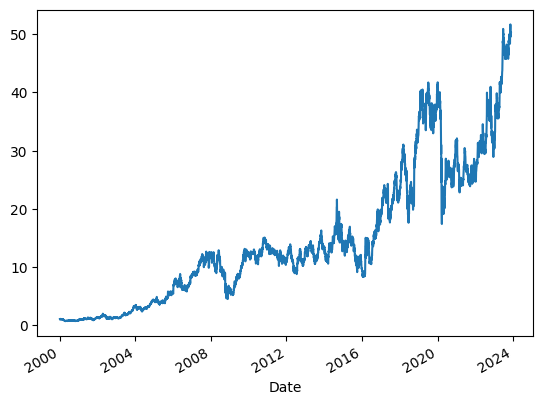

In [7]:
df_bb.plot()

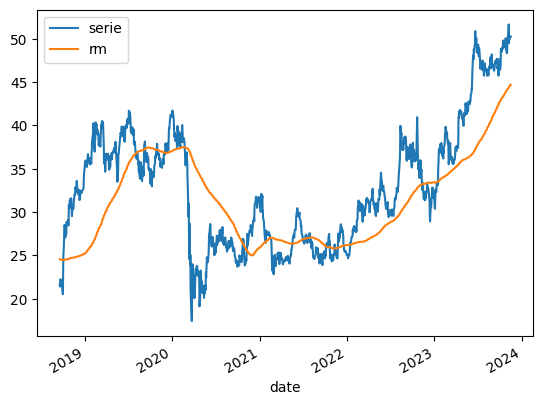

In [43]:
#Linha de tendência dentro do período 2019-2024
ts = df_bb.copy()
ts = ts.iloc[-(365*4):]
rm_size = 180
show_tendencia(ts, rm_size)

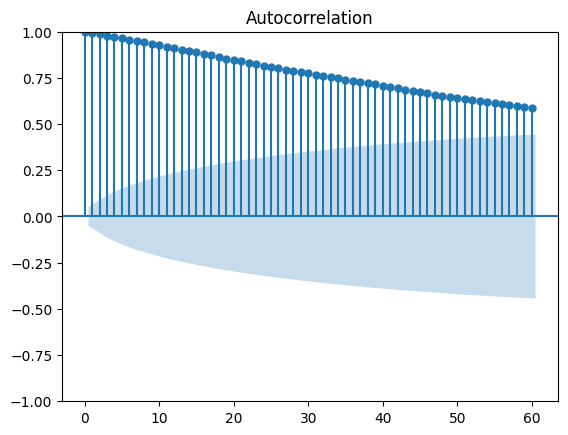

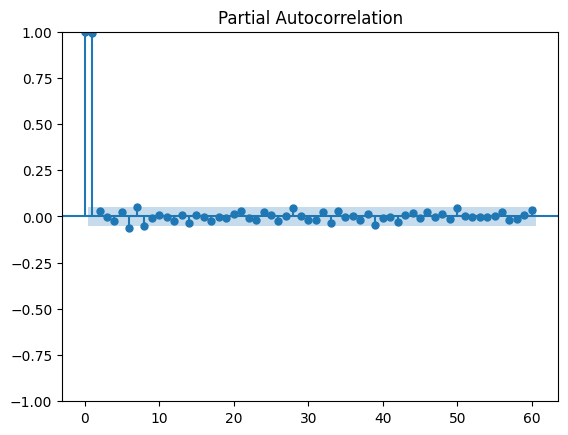

In [44]:
plot_acf(ts, lags=60)
plt.show()
plot_pacf(ts, lags=60)
plt.show()

Em uma primeira plotagem do gráfico de Autocorrelação da cotação da ação BBAS3 (Banco do Brasil), verifica-se um comportamento onde há uma tendência decrescente da correlação. Já na Autocorrelação Parcial é observado um comportamento do tipo "Random Walk" onde existe uma Correlação muito alta no tempo t-1 e praticamente Zero a partir do tempo t-2.

Esse comportamento é típico de Séries Temporais de Cotação de Ações, onde a correlação entre hoje e um tempo passado qualquer é praticamento nulo, o que torna difícil ou praticamente impossível prever cotações de ativos no futuro. Quanto maior o espaço da previsão, mais incerto será o resultado...

In [10]:
#Teste para investigar a Estacionariedade da Série Temporal (Abaixo de 0.05 é Não Estacionaria)
kpss = KPSSTest()
kpss.should_diff(ts)

(0.01, True)

In [11]:
#Aplicando a Diferenciação
diff_bb = difference(df_bb, m = 1)
kpss.should_diff(diff_bb)

(0.1, False)

<Axes: >

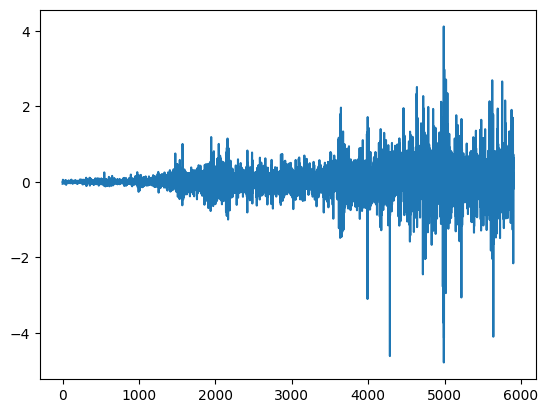

In [46]:
diff_bb.plot()

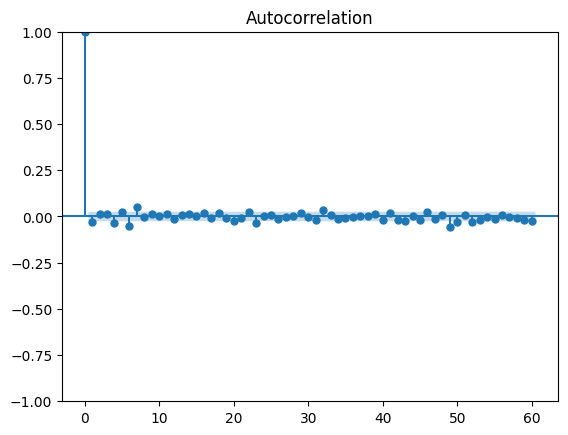

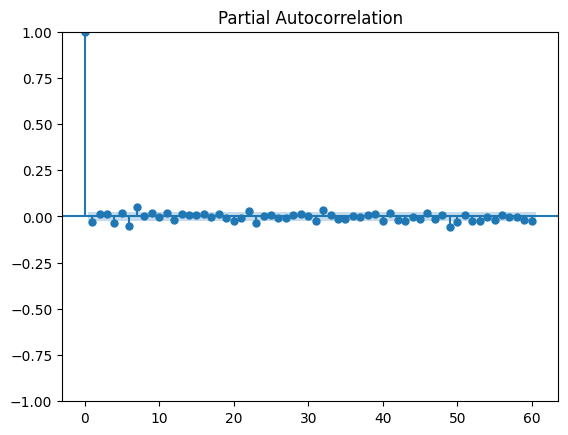

In [45]:
plot_acf(diff_bb, lags=60)
plt.show()
plot_pacf(diff_bb, lags=60)
plt.show()

Após o Precesso de Diferenciação, o novo comportamento tanto do gráfico de Autocorrelação quanto o de Autocorrelação Parcial se enquadram como "Ruído Branco".

Mesmo coma diferenciação é muito difícil a criação de um modelo capaz de fazer previsões para Séries Temporais de Ativos financeiros tipo "Stocks".

**Análise - Monthly Lake Levels (Lake Erie, 1921–1970)**

In [13]:
database_link = 'https://raw.githubusercontent.com/tbatenorio/Time_Series_Analysis/main/lakeerie.txt'

db_lake_lv = pd.read_csv(database_link)
db_lake_lv.head(10)

,14.7630
0,14.649
1,15.085
2,16.376
3,16.926
4,16.774
5,16.490
6,15.769
7,15.180
8,14.383
9,14.478


<Axes: xlabel='date'>

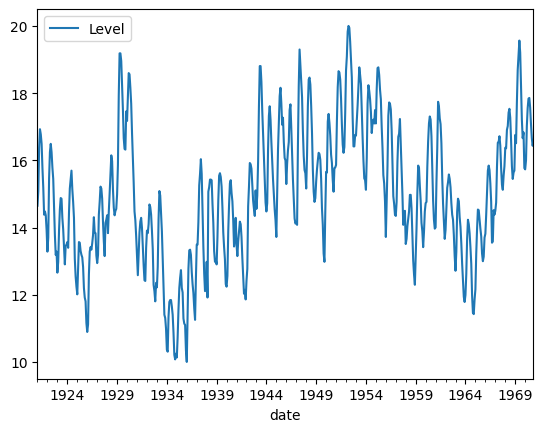

In [14]:
db_lake_lv.rename(columns={db_lake_lv.columns[0]: 'Level'}, inplace=True)

db_lake_lv['date'] = pd.date_range(
    start='1921-01-01', end= '1970-12-30', freq='M'
  )
db_lake_lv.set_index('date', inplace=True)

db_lake_lv.plot()

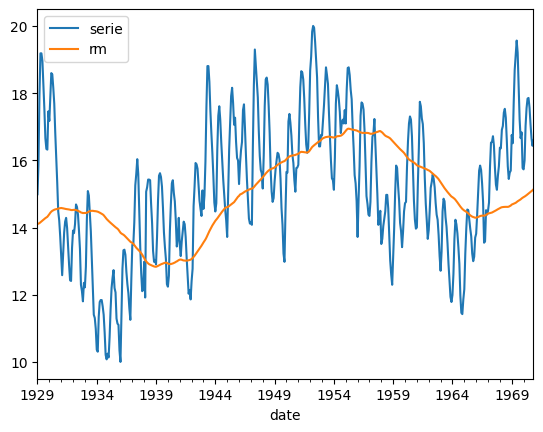

In [15]:
#linha de tendência com base em uma janela de 4 anos, totalizando 96 meses
ts = db_lake_lv['Level']
rm_size = 96 #(roulling mean)
show_tendencia(ts, rm_size)

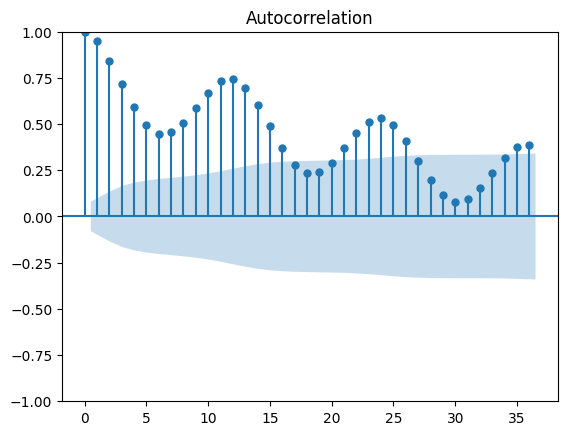

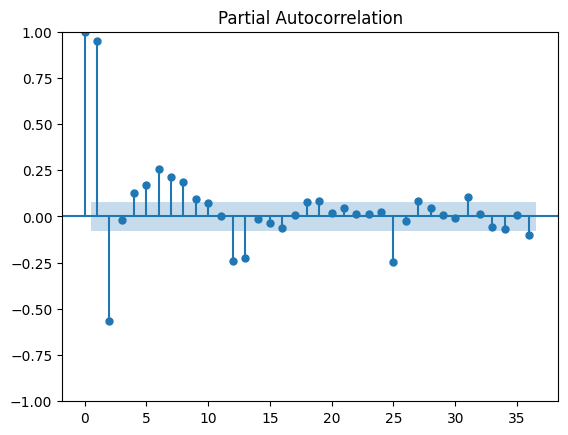

In [16]:
plot_acf(ts, lags=36)
plt.show()
plot_pacf(ts, lags=36)
plt.show()

Os Gráficos de Autocorrelação apresenta um decaimento do nível de correlação ao longo do tempo com oscilações positivas sazonalmente.

Já a Autocorrelação Partial apresentam ambos um comportamento de baixa intensidade na maioria dos t(s), com valores de maior relevância entre os 13 primeiros registros e picos espaçados a partir disso.  

In [17]:
#Teste para investigar a Estacionariedade da Série Temporal (Abaixo de 0.05 é Não Estacionaria)
kpss.should_diff(ts)

(0.01, True)

<Axes: xlabel='date'>

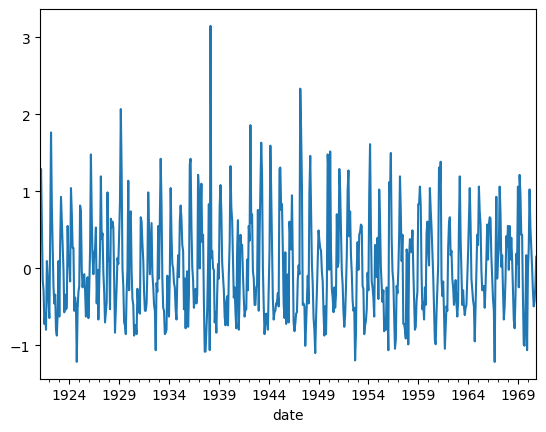

In [18]:
#Aplicando a Diferenciação
db_lake_diff = ts.diff().iloc[1:]
db_lake_diff.plot()

In [19]:
kpss.should_diff(db_lake_diff)

(0.1, False)

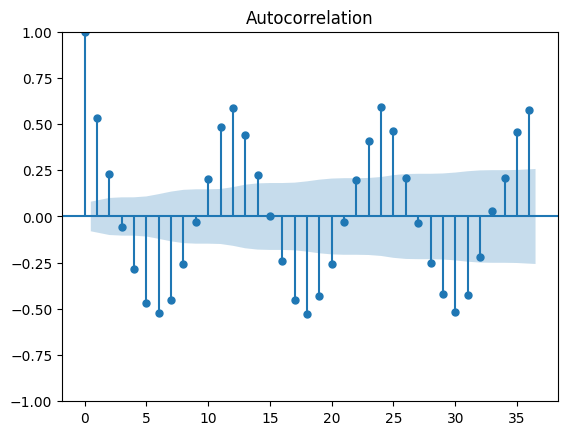

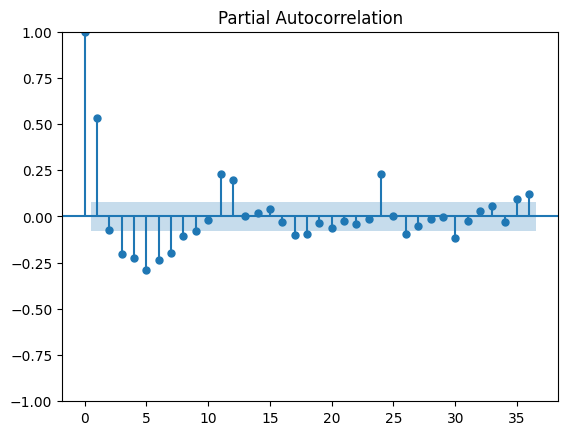

In [20]:
plot_acf(db_lake_diff, lags=36)
plt.show()
plot_pacf(db_lake_diff, lags=36)
plt.show()

Após a Diferenciação, o grau de correlação acumulada passa a ter um comportamento sazonal, apresentando um comportamento gráfico bem visível quanto ao início e fim dos ciclos. (Gráfico 1)


**Análise - Base sem Nome**

In [21]:
db_link = 'https://raw.githubusercontent.com/tbatenorio/Time_Series_Analysis/main/base_sem_nome.csv'

db_sem_nome = pd.read_csv(db_link)
db_sem_nome.head(10)

,Unnamed: 0,actual
0,0,-0.852753
1,1,-1.703346
2,2,-0.451841
3,3,0.392410
4,4,0.498923
5,5,1.380141
6,6,-0.725135
7,7,0.561480
8,8,-0.974607
9,9,-1.654252


<Axes: xlabel='Registro'>

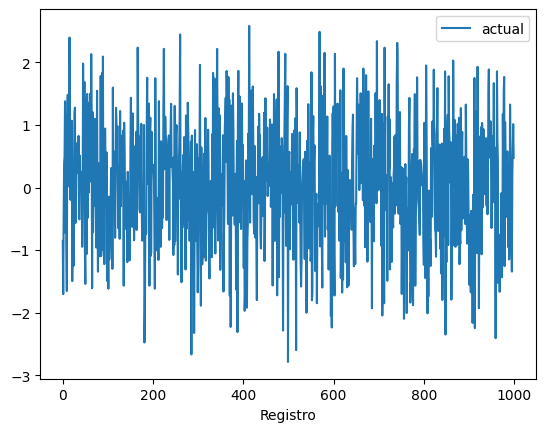

In [22]:
db_sem_nome.rename(columns={db_sem_nome.columns[0]: 'Registro'}, inplace=True)

db_sem_nome.set_index('Registro', inplace=True)

db_sem_nome.plot()

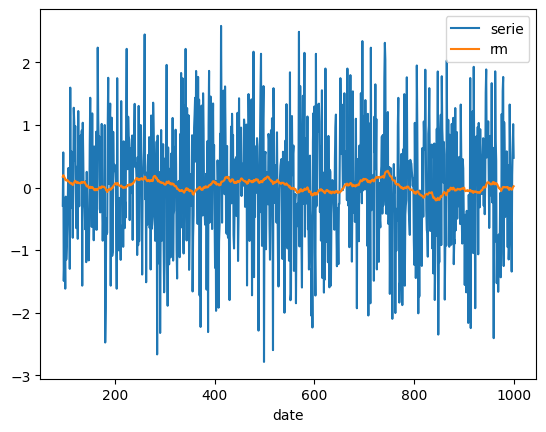

In [23]:
ts = db_sem_nome['actual']
rm_size = 96
show_tendencia(ts, rm_size)

Em uma primiera análise, o gráfico apresenta um comportamento Estacionário (Equilíbrio Estático).

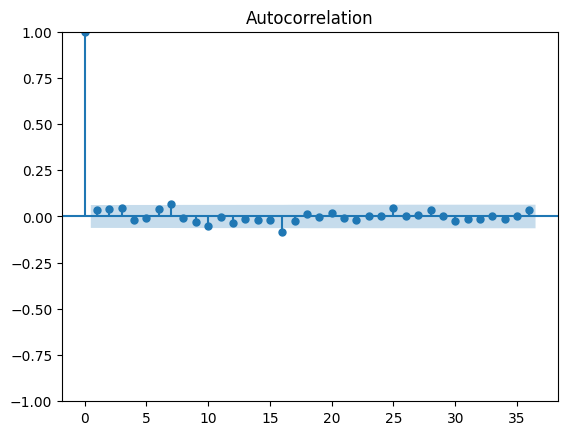

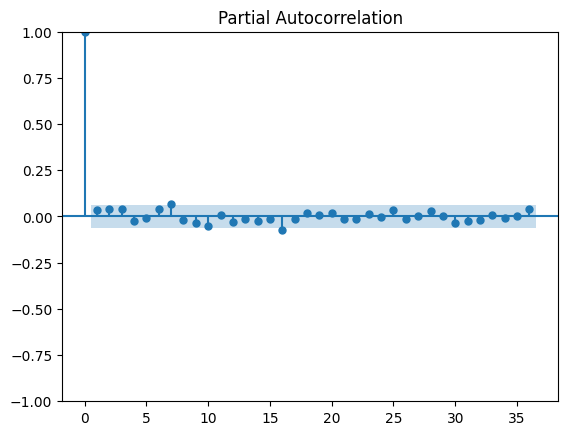

In [24]:
plot_acf(ts, lags=36)
plt.show()
plot_pacf(ts, lags=36)
plt.show()

In [25]:
kpss.should_diff(ts)

(0.1, False)

O teste KPSS confirma nossa suspeita de Estacionariedade, dado que o valor de p-Value é maior que 0.05. Logo não é necessário fazer a diferenciação!

Os gráficos de Autocorrelação apresentam um Comportamento do tipo "Ruído Branco"

**Análise - Monthly milk production: pounds per cow. Adjusted for length of month (1962–1975)**

In [26]:
db_milk_link = 'https://raw.githubusercontent.com/tbatenorio/Time_Series_Analysis/main/milk.txt'

db_milk = pd.read_csv(db_milk_link)
db_milk.head(10)

,578.3
0,609.8
1,628.4
2,665.6
3,713.8
4,707.2
5,628.4
6,588.1
7,576.3
8,566.5
9,561.1


<Axes: xlabel='date'>

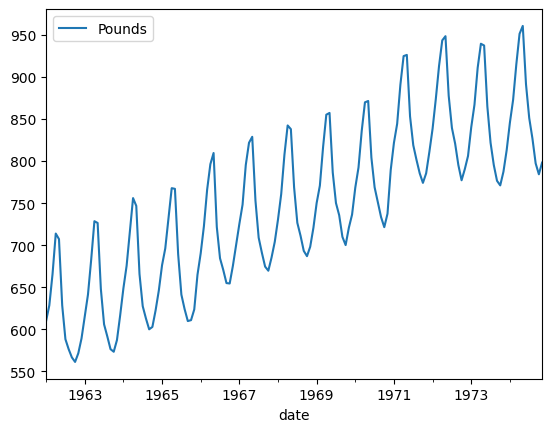

In [27]:
db_milk.rename(columns={db_milk.columns[0]: 'Pounds'}, inplace=True)

db_milk['date'] = pd.date_range(
    start='1962-01-01', end= '1974-12-30', freq='M'
  )
db_milk.set_index('date', inplace=True)

db_milk.plot()

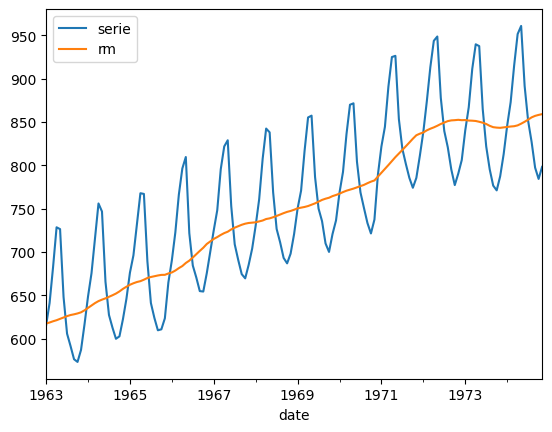

In [28]:
ts = db_milk['Pounds']
rm_size = 12
show_tendencia(ts, rm_size)

O gráfico de tendência mostra um valor crescente da produção de leite ao longo do tempo. Isso pode se dar à evolução tecnológica e dos processos de criação do gado leiteiro.

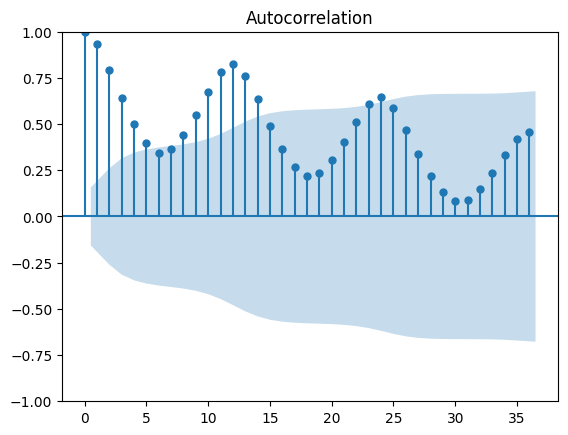

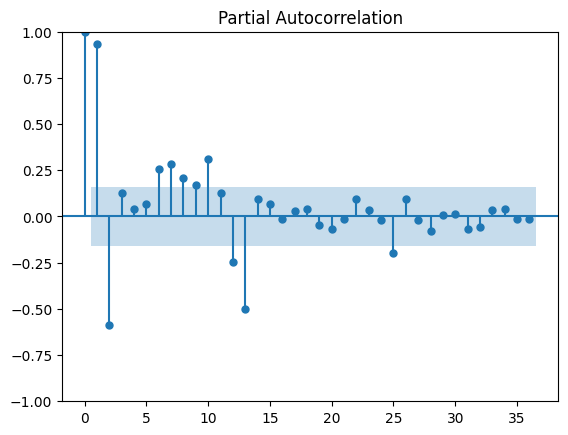

In [29]:
plot_acf(ts, lags=36)
plt.show()
plot_pacf(ts, lags=36)
plt.show()

O gráfico de Autocorrelação exibe uma queda do grau de correlação ao longo da série histórica, se dando principalmente a partir do tempo (t-15).

In [30]:
kpss.should_diff(ts)

(0.01, True)

<Axes: xlabel='date'>

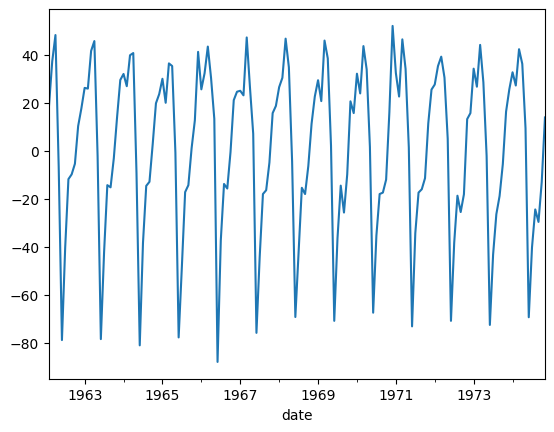

In [31]:
#Aplicando a Diferenciação
db_milk_diff = ts.diff().iloc[1:]
db_milk_diff.plot()

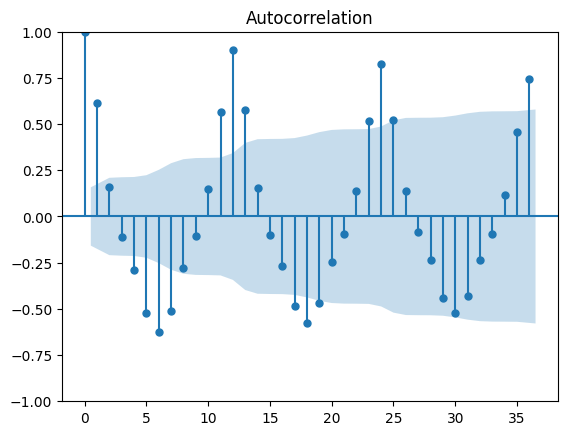

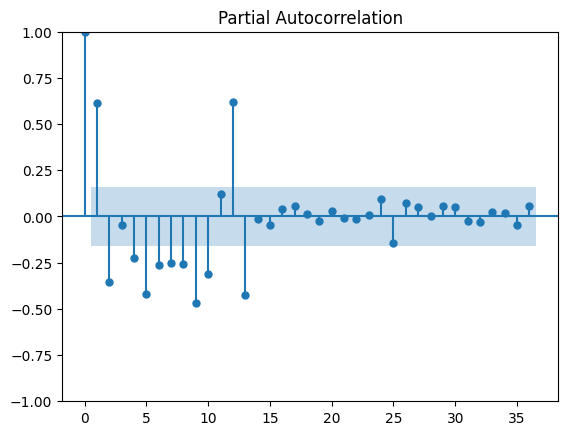

In [32]:
plot_acf(db_milk_diff, lags=36)
plt.show()
plot_pacf(db_milk_diff, lags=36)
plt.show()

In [33]:
kpss.should_diff(db_milk_diff)

(0.1, False)

**Conclusão**

De modo geral, comportamentos de Tendência ou Sazonais refletem a não Estacionariedade dos dados.

A estacionariedade é uma propriedade importante em análise de séries temporais e implica que as propriedades estatísticas da série não mudam ao longo do tempo,como média e variância.

Após o processo de Diferenciação, a nova série passa a ter um comportamento estacionário, característica importante para utilização em Modelos Preditivos e Regressivos.